In [84]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import os

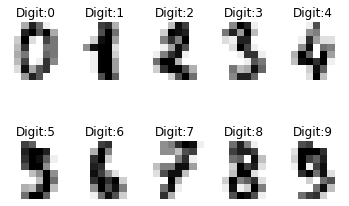

In [26]:
digits = datasets.load_digits()

for label, img in zip(digits.target[:10], digits.images[:10]):
	plt.subplot(2, 5, label+1)
	plt.axis('off')
	plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
	plt.title('Digit:{0}'. format(label))

plt.show()

In [53]:
flag_3_8=(digits.target==3)+(digits.target==8)

images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

images = images.reshape(images.shape[0],-1)

## AdaBoostClassifier

In [56]:
from sklearn import tree, ensemble

n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=20)
classifier.fit(images[:train_size], labels[:train_size])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

## SGDClassifier

In [63]:
from sklearn.linear_model import SGDClassifier

n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = SGDClassifier(max_iter=5, random_state=42)
classifier.fit(images[:train_size], labels[:train_size])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

##  DecisionTreeClassifier

In [46]:
from sklearn import tree

n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = tree.DecisionTreeClassifier()
classifier.fit(images[:train_size], labels[:train_size])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = RandomForestClassifier(n_estimators=20, max_depth=3, criterion="gini")
classifier.fit(images[:train_size], labels[:train_size])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## SVC

In [58]:
from sklearn import svm

n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = svm.SVC(C = 1.0, gamma = 0.001)
classifier.fit(images[:train_size], labels[:train_size])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

expected=labels[train_size:]
predicted=classifier.decision_function(images[train_size:])
predicted

array([ -9105.82406228,   8670.87965933, -15664.54808354, -11522.45045184,
       -13750.57998301, -12711.4306355 ,   7771.89464241, -10067.64136532,
       -12010.60898253,   6186.58773086,  11213.17062115, -10091.80762922,
        -9328.15369012,  11812.49396576,   4480.44949983,   8617.71387876,
        13175.47124947,   9913.02562356, -14639.89849437,   1010.17400442,
       -12010.60898253,  17776.72789519, -11425.78539625,  17133.90527557,
         9246.03674004,  10120.85549306,   3185.13775503,   9734.19527073,
       -12112.10729089,  -8284.17108983,  -7844.34508693, -13924.57708306,
         7950.72499524,  -8139.17350645, -10507.46736822,  -9705.14740689,
         6974.40793386, -12474.60124932,  -8472.66794821,   4886.44273328,
        15732.26196962,   9221.87047615,  10536.51523207,  12421.48381593,
       -12010.60898253,  15819.26051965, -10473.63459877,  12991.80764386,
        -8119.84049534,  20082.18947083,  13687.79604405,  14789.77767769,
        -9840.4784847 ,  

In [71]:
threshold = 0
y_some_digit_pred = (predicted > threshold)
y_some_digit_pred

array([False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False, False,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [81]:
threshold = -500000
y_some_digit_pred = (predicted > threshold)
y_some_digit_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [82]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(classifier, digits, flag_3_8, cv=3)

ValueError: Found input variables with inconsistent numbers of samples: [5, 1797]